<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Brian Pinke

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



**Unable to edit/delete cell above.**
# Pseudocode of Workflow
###### Import packages
* Import packages that are needed in PEP 8 order
* Only includeds packages that are used
* Gets the ndvi-automation data using earthpy
* Changes the working directory to earth-analytics/data

###### Functions
* Created 4 functions, each defined in functions
    * open_clean_bands
    * calc_mndvi
    * temp_list
    * df_create

###### Task 1
* Use os to set the parent path of the data
* Use glob to get a list of all sites
* Use os to get the name of the desired site
* Open the clipping shapefile
* Open the crop boundary using geopandas for the desired site
* Create a sorted list of all tif bands
* Select the specific landsat scene desired
* Open the bands at the scene
* Open and clip the cloud mask layer using rasterio and clip
* Loop through bands for desired scene using open bands function
* Store bands in a list and calculate mean ndvi from mndvi function
* Use temp_list function to create list of desired attributes
* Create pandas df of landsat scene from list

###### Task 2
* In this case we desire all scenes from all sites defined in the parent path
* Initial path steps are completed in prior task.
* Loop through all sites in the sites list (2 sites). For each loop:
    * Get site name 
    * Open shapefile of site for clipping using os and gpd
    * Get subdirectories of the site and create path to all scenes
    * Loop through all scenes at each site. For each loop:
        * Create sorted list of all bands in scene
        * Get the cloud mask layer for scene and clip with rasterio
        * Loop through the two bands per scene. For each loop:
            * Open and clean the two bands using open_clean_bands
            * Append opened bands to outer list: all_bands
        * Calculate mean ndvi of single scene using calc_mndvi
        * Create list of site name, scene date, scene mean ndvi 
        * Append this list to outermost list: all_list
* Use all_list, a list of lists containing site name, date and mean ndvi, to create a pandas dataframe
* Set dataframe date column to datetime format and set date to index
* Return completed ndvi_df dataframe.

###### Task 3
* Create a new df without nan values
* Create plot
* Group df by site name and loop through:
    * plot x-axis as date
    * plot y-axis as mean ndvi
    * set label as site name
* Set axis labels and x-axis boundaries
* Set x-axis format to month and create plot grid

###### Bonus Task
* Define desired directory location for .csv file
* Check if location exists
    * If it exists, continue to end of cell
    * If doesn't exist, make the directory location and continue to end of cell
* use .to_csv to create csv file at desired directory location
    

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

# YOUR CODE HERE
# Import necessary packages
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
import earthpy as et
import pandas as pd


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


# Get data and set working directory
data = et.data.get_data('ndvi-automation')
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

# Functions to process and optimize code
* These four functions are created to reduce copypasta code throughout the notebook
* The use of functions also allows for easier modification of code and flow paths
* Open_clean_bands function utilizes 'from_disk' to slice where it's only grabbing the data that is needed, saving time and memory resources

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

# YOUR CODE HERE
def open_clean_bands(band_path,
                     crop_bound,
                     valid_range=None,
                     a_mask=None,
                     vals=None):
    """Open and mask a single landsat band using a pixel_qa layer.

    Parameters
    -----------
    band_path : string
        A path to the array to be opened
    crop_bound : geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using 
            rasterio mask().
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None
    a_mask : xarray DataArray
        An xarray DataArray with values that have not yet been set to 1
    vals : list
        A list of values needed to create the cloud mask

    Returns
    -----------
    arr : xarray DataArray
        An xarray DataArray with values that should be masked set to 1 for 
            True (Boolean)
    """
    # Open and crop band
    band_crop = rxr.open_rasterio(band_path, masked=True).rio.clip(crop_bound.geometry,
                                                                   from_disk=True).squeeze()
    # Mask band
    # Only run this step if a valid range tuple is provided
    if valid_range:
        mask = ((band_crop < valid_range[0]) | (band_crop > valid_range[1]))
        band_crop = band_crop.where(~xr.where(mask, True, False))

    if len(a_mask.shape) == 3 & a_mask.shape[0] == 1:
        a_mask = a_mask.squeeze()

    band_crop = band_crop.where(~a_mask.isin(vals))

    return band_crop


def calc_mndvi(band_list):
    """Calculate mean ndvi from a list of two bands from a single scene.

    Parameters
    -----------
    band_list : list
        A list of two opened bands of xarray DataArray.

    Returns
    -----------
    mndvi : xarray DataArray
        An xarray DataArray of mean normalized difference vegetation index for 
            a single scene.
    """
    # Calculate mean ndvi
    # I expect to see RuntimeWarnings when calculated on nan values
    mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))

    return mndvi


def temp_list(site_name, adir, ndvi):
    """Take the site name, scene date, and scene ndvi, and create a list.

    Parameters
    -----------
    site_name : string
        String of the site's name.
    adir : string
        String of path to scene file.
    ndvi : ndvi of scene

    Returns
    -----------
    temp_list : list
        A list of the site name, scene date, and scene ndvi.
    """

    # Append site name, site date, mean ndvi to temp_list
    temp_list = []
    temp_list.append(site_name)
    temp_list.append(adir.split(os.sep)[4][10:18])
    temp_list.append(ndvi)

    return temp_list


def df_create(all_list):
    """Take a list of lists containing site name, site date, and mean ndvi and 
            create pandas dataframe indexed at date with renamed columns.

    Parameters
    -----------
    all_list : list
        List of all lists containing site name, site date, and mean ndvi.

    Return
    -----------
    ndvi_df : pandas dataframe
        Pandas dataframe indexed at date with renamed columns.
    """
    # Create pandas dataframe from list
    ndvi_df = pd.DataFrame(all_list,
                           columns=["site", "date", "mean_ndvi"])
    ndvi_df["date"] = pd.to_datetime(ndvi_df["date"])
    ndvi_df = ndvi_df.reset_index().set_index(["date"])

    return ndvi_df

# The Data Used
* The same data used in task 1, task 2, and the figure
* The data is imported using et.get_data(ndvi_automation)
* This data is Landsat data from two sites:
    * San Joaquin Experimental Range / SJER
    * Harvard Forest / HARV
* SJER is a terrestrial NEON field site located approximately 40 km (25 mi.) north of Fresno, CA. 
* HARV is a terrestrial NEON field site located approximately 65 miles west of Boston, Massachusetts in the county of Worcester. 

In [6]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# YOUR CODE HERE
# Get a list of each directory
path = os.path.join("ndvi-automation", "sites")

# Get a list of both site directories
sites = glob(path + "/*/")

# Get the site name
site_name = os.path.basename(os.path.normpath(sites[0]))

# Open up the shapefile for clipping your landsat data to the study area
vector_dir = os.path.join(sites[0],
                          "vector")

# Open crop boundary
site_boundary_path = os.path.join(vector_dir,  site_name + "-crop.shp")
crop_bound = gpd.read_file(site_boundary_path)

landsat_dir = os.path.join(sites[0],
                           "landsat-crop")

# Path to all desired .tif files
landsat_dirs = sorted(glob(os.path.join(landsat_dir, "LC08*")))

# Select just a single directory and grab bands 4-5 from the directory
adir = landsat_dirs[4]

# Open bands
band_paths = sorted(glob(os.path.join(adir, "*band*[4-5].tif")))

# Open and clip the cloud mask layer
# Cloud no data vals for Landsat 8 -
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]

# Get cloud mask layer path
qa_r = glob(os.path.join(adir, "*qa*"))

# Clip the cloud mask layer
cl_mask = rxr.open_rasterio(qa_r[0], masked=True).rio.clip(
    crop_bound.geometry, from_disk=True).squeeze()

# Open and clean bands
all_bands = []
for aband in band_paths:
    cleaned_band = open_clean_bands(band_path=aband,
                                    crop_bound=crop_bound,
                                    valid_range=(0, 10000),
                                    a_mask=cl_mask,
                                    vals=vals)
    all_bands.append(cleaned_band)


# Calculate mean ndvi
final_ndvi = calc_mndvi(all_bands)

# Append site name, site date, ndvi mean to dir_list
dir_list = temp_list(site_name=site_name, adir=adir, ndvi=final_ndvi)

# Append dir_list to all_list
all_list_scene = []
all_list_scene.append(dir_list)

# Create pandas dataframe from scene list
ndvi_df = df_create(all_list=all_list_scene)

ndvi_df

,index,site,mean_ndvi
date,,,
2017-03-17,0,HARV,0.281132


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

# Code Processing
* The code below utilizes some objects from Task 1 to reduce processing
* Nested for loops are utilized to reduce copypasta of code
* Several lists are used to capture information from loops
* Four functions are utilized throughout, helping make the code more concise and readable

In [8]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# YOUR CODE HERE

all_list = []
for asite in sites:

    # Get the site name
    site_name = os.path.basename(os.path.normpath(asite))

    # Open site shapefile for clipping landsat data to study area
    vector_dir = os.path.join(asite, "vector")

    # Open site crop boundary
    site_boundary_path = os.path.join(vector_dir, site_name + "-crop.shp")
    crop_bound = gpd.read_file(site_boundary_path)

    # Get subdirectories of site
    site_dir = os.path.join(asite, "landsat-crop")

    # Path to all desired .tif files
    landsat_dirs = sorted(glob(os.path.join(site_dir, "*")))

    # Create df
    site_list = []
    for adir in landsat_dirs:

        # Open bands
        band_paths = sorted(glob(os.path.join(adir, "*band*[4,5].tif")))

        # Get cloud mask layer path
        qa_r = glob(os.path.join(adir, "*qa*"))

        # Clip the cloud mask layer
        cl_mask = rxr.open_rasterio(qa_r[0], masked=True).rio.clip(
            crop_bound.geometry, from_disk=True).squeeze()
        
        # Open and clean bands
        all_bands = []
        for aband in band_paths:
            cleaned_band = open_clean_bands(band_path=aband,
                                            crop_bound=crop_bound,
                                            valid_range=(0, 10000),
                                            a_mask=cl_mask,
                                            vals=vals)
            all_bands.append(cleaned_band)

        # Calculate mean ndvi
        final_ndvi = calc_mndvi(all_bands)

        # Append site name, site date, ndvi mean to dir_list
        site_list = temp_list(site_name=site_name, adir=adir, ndvi=final_ndvi)

        # Append site_list to all_list
        all_list.append(site_list)

# Create final df from returned list of lists with mean ndvi, site, and date
ndvi_df = pd.DataFrame(all_list,
                       columns=["site", "date", "mean_ndvi"])
ndvi_df["date"] = pd.to_datetime(ndvi_df["date"])
ndvi_df = ndvi_df.reset_index().set_index(["date"])

ndvi_df

<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))
<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))
<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))
<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))
<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))
<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-band_list[0])/(band_list[1]+band_list[0]))
<ipython-input-5-acdfca308fb0>:66: RuntimeWarning: Mean of empty slice
  mndvi = np.nanmean((band_list[1]-

,index,site,mean_ndvi
date,,,
2017-01-12,0,HARV,NaN
2017-01-28,1,HARV,NaN
2017-02-13,2,HARV,NaN
2017-03-01,3,HARV,NaN
2017-03-17,4,HARV,0.281132
2017-04-02,5,HARV,0.251133
2017-04-18,6,HARV,0.541080
2017-05-04,7,HARV,0.568924
2017-05-20,8,HARV,0.811310


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points += 2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points += 2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points += 3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points += 3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:31.873108.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

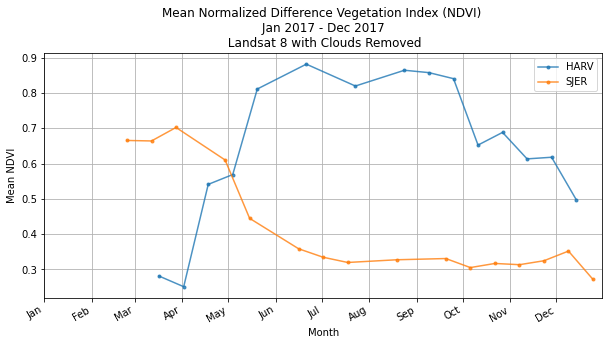

In [10]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# YOUR CODE HERE
# Create new df with nan values removed for plotting
plot_df = ndvi_df[ndvi_df['mean_ndvi'].notna()]

date_form_month = DateFormatter("%b")

f, ax = plt.subplots(figsize=(10, 5))
for title, group in plot_df.reset_index().groupby('site'):
    group.groupby('site').plot(x='date',
                               y='mean_ndvi',
                               title="Mean Normalized Difference Vegetation Index (NDVI) \n Jan 2017 - Dec 2017 \n Landsat 8 with Clouds Removed",
                               label=title,
                               style='.-',
                               ax=ax,
                               alpha=.8)

ax.set(xlabel="Month", ylabel="Mean NDVI", xlim=['2017-01-01', '2017-12-31'])


ax.xaxis.set_major_formatter(date_form_month)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.grid(b=None, which='major', axis='both')

# plt.show()

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Ignore this cell for the autograding tests

In [12]:
# Ignore this cell for the autograding tests

# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

A higher NDVI value generally indicates more vegetation, and a lower value generally indicates less vegetation. In the NDVI plot, HARV has a higher mean NDVI, above 0.8, from mid May to late September. This correlates well with the warmer and rainy season of MA and would be the good period of time to fly. SJER has a higher NDVI, above 0.65, between mid February and April, staying above 0.6 through the end of April. This correlates well with the peak growing season of the area in early March, and would be a good period of time to fly.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

The workflow here captures mean ndvi over the course of a single year. If data were provided for multiple years, this workflow would loop through the additional directory paths and capture the NDVI for all dates provided. The plot could then be adapted to show vegetation changes over time by plotting different line colors for each year, with constant symbols for each location.

Another way to capture vegetation change over time would be to groupby mean NDVI for the full year, and plot Mean NDVI per scene by year, rather than by month.


# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [13]:
csv_dir = os.path.join(et.io.HOME, 'earth-analytics',
                       'spring', 'hw', 'ea-2021-04-ndvi-automation-brianpinke')

# Check path exists before trying to change directory, else make the directory
if os.path.exists(csv_dir):
    print("Directory exists! Creating CSV.")
else:
    print("Directory did not exist. Making data directory and creating CSV.")
    os.makedirs(csv_dir)

# Drop column of index to leave just three desired columns. send csv to path
ndvi_df.drop(columns='index').to_csv(os.path.join(csv_dir, 'ndvi_df.csv'))

Directory exists! Creating CSV.
